In [25]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas as pd
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
from scipy.optimize import fsolve
sns.set()

# Zadanie 1

## Metoda Eulera

In [26]:
def euler(f,x0,y0,n,xn):
    h=(xn-x0)/n
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    x[0]=x0
    y[0]=y0
    for i in range(1,n+1):
        y[i]=y[i-1]+h*f(x[i-1],y[i-1])
        x[i]=x[i-1]+h
    return x,y

## Metoda RK2

In [27]:
def runge_kutta_2(f,x0,y0,n,xn):
    h=(xn-x0)/n
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    x[0]=x0
    y[0]=y0
    for i in range(1,n+1):
        k1=h*f(x[i-1],y[i-1])
        k2=h*f(x[i-1]+h*0.5,y[i-1]+k1*0.5)
        y[i]=y[i-1]+k2
        x[i]=x[i-1]+h
    return x,y

## Metoda RK4

In [28]:
def runge_kutta_4(f,x0,y0,n,xn):
    h=(xn-x0)/n
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    x[0]=x0
    y[0]=y0
    for i in range(1,n+1):
        k1=h*f(x[i-1],y[i-1])
        k2=h*f(x[i-1]+h*0.5,y[i-1]+k1*0.5)
        k3=h*f(x[i-1]+h*0.5,y[i-1]+k2*0.5)
        k4=h*f(x[i-1]+h,y[i-1]+k3)
        y[i]=y[i-1]+(k1+2*k2+2*k3+k4)/6
        x[i]=x[i-1]+h
    return x,y

## Równanie różniczkowe:

In [29]:
def f(x,y):
    return x**2-4*y

## Funkcja analityczna:

In [30]:
def analitycal_f(x):
    return (31/32)*np.exp(-4*x)+(1/4)*x**2 -(1/8)*x + 1/32

In [31]:
x0=0
y0=1
xn=0.03
analitycal_sol=analitycal_f(xn)
n=[1,2,4]
euler_method_abs=[]
runge_kutta_2_abs=[]
runge_kutta_4_abs=[]
for i in n:
    x,y=euler(f,x0,y0,i,xn)
    euler_method_abs.append(abs(analitycal_sol-y[-1]))
    x,y=runge_kutta_2(f,x0,y0,i,xn)
    runge_kutta_2_abs.append(abs(analitycal_sol-y[-1]))
    x,y=runge_kutta_4(f,x0,y0,i,xn)
    runge_kutta_4_abs.append(abs(analitycal_sol-y[-1]))

In [32]:
data_frame=pd.DataFrame({'n':n,'euler':euler_method_abs,'runge_kutta_2':runge_kutta_2_abs,'runge_kutta_4':runge_kutta_4_abs})
data_frame

,n,euler,runge_kutta_2,runge_kutta_4
0,1,0.006929,0.000278,2.050303e-07
1,2,0.003326,0.000066,1.219813e-08
2,4,0.001631,0.000016,7.438453e-10


Widać, że metoda RK4 ma zawsze najmniejszy błąd.

# Zadanie 2

## Równanie różniczkowe:

In [33]:
def f_sin(x,y):
    return np.sin(y)

## Rozwiązanie:

C:\Users\Admin\AppData\Local\Temp/ipykernel_2140/1082220780.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196, 1)). The keyword argument will take precedence.
  plt.plot(x3,y3,'g',label='odeint', linestyle='dashed', color='black', alpha=0.5)


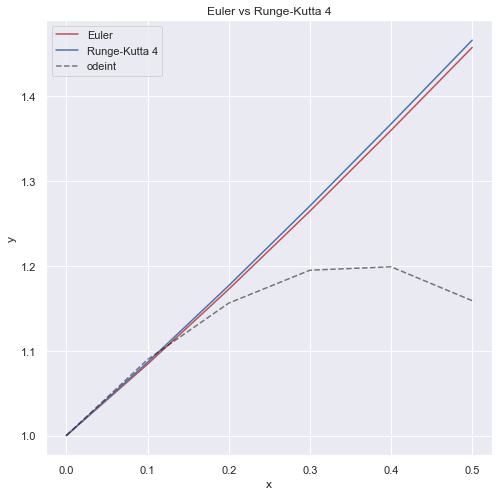

In [34]:
h=0.1
xn=0.5
x0=0
y0=1
n=int((xn-x0)/h)

x,y=euler(f_sin,x0,y0,n,xn)
x1,y1=runge_kutta_4(f_sin,x0,y0,n,xn)
x3=np.linspace(x0, xn, n+1)
y3=odeint(f, y0, x)


plt.figure(figsize=(8,8))
plt.plot(x,y,'r',label='Euler')
plt.plot(x1,y1,'b',label='Runge-Kutta 4')
plt.plot(x3,y3,'g',label='odeint', linestyle='dashed', color='black', alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler vs Runge-Kutta 4')
plt.show()



# Zadanie 3

## Metoda RK4 pod zadanie, metoda z równaniem różniczkowym drugiego stopnia

In [35]:
def runge_kutta_4(Q, Omega, A, theta0, omega0, tau_end, h):
    tau = np.arange(0, tau_end, h)
    theta = np.zeros_like(tau)
    omega = np.zeros_like(tau)
    theta[0], omega[0] = theta0, omega0
    
    for i in range(1, len(tau)):
        k1_theta = h * omega[i-1]
        k1_omega = h * (-1/Q * omega[i-1] - np.sin(theta[i-1]) + A * np.cos(Omega * tau[i-1]))
        
        k2_theta = h * (omega[i-1] + 0.5 * k1_omega)
        k2_omega = h * (-1/Q * (omega[i-1] + 0.5 * k1_omega) - np.sin(theta[i-1] + 0.5 * k1_theta) + A * np.cos(Omega * (tau[i-1] + 0.5 * h)))
        
        k3_theta = h * (omega[i-1] + 0.5 * k2_omega)
        k3_omega = h * (-1/Q * (omega[i-1] + 0.5 * k2_omega) - np.sin(theta[i-1] + 0.5 * k2_theta) + A * np.cos(Omega * (tau[i-1] + 0.5 * h)))
        
        k4_theta = h * (omega[i-1] + k3_omega)
        k4_omega = h * (-1/Q * (omega[i-1] + k3_omega) - np.sin(theta[i-1] + k3_theta) + A * np.cos(Omega * (tau[i-1] + h)))
        
        theta[i] = theta[i-1] + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) / 6
        omega[i] = omega[i-1] + (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega) / 6
        
    return tau, theta, omega


## Parametry

In [36]:
Q = 2
Omega = 2/3
A1, A2, A3 = 0.5, 0.5, 1.35
theta0_1, theta0_2, theta0_3 = 0.01, 0.3, 0.3
omega0 = 0
tau_end = 100 #mozna dostosowac
h = 0.01

In [37]:
tau, theta1, omega1 = runge_kutta_4(Q, Omega, A1, theta0_1, omega0, tau_end, h)
tau, theta2, omega2 = runge_kutta_4(Q, Omega, A2, theta0_2, omega0, tau_end, h)
tau, theta3, omega3 = runge_kutta_4(Q, Omega, A3, theta0_3, omega0, tau_end, h)

## Wykresy

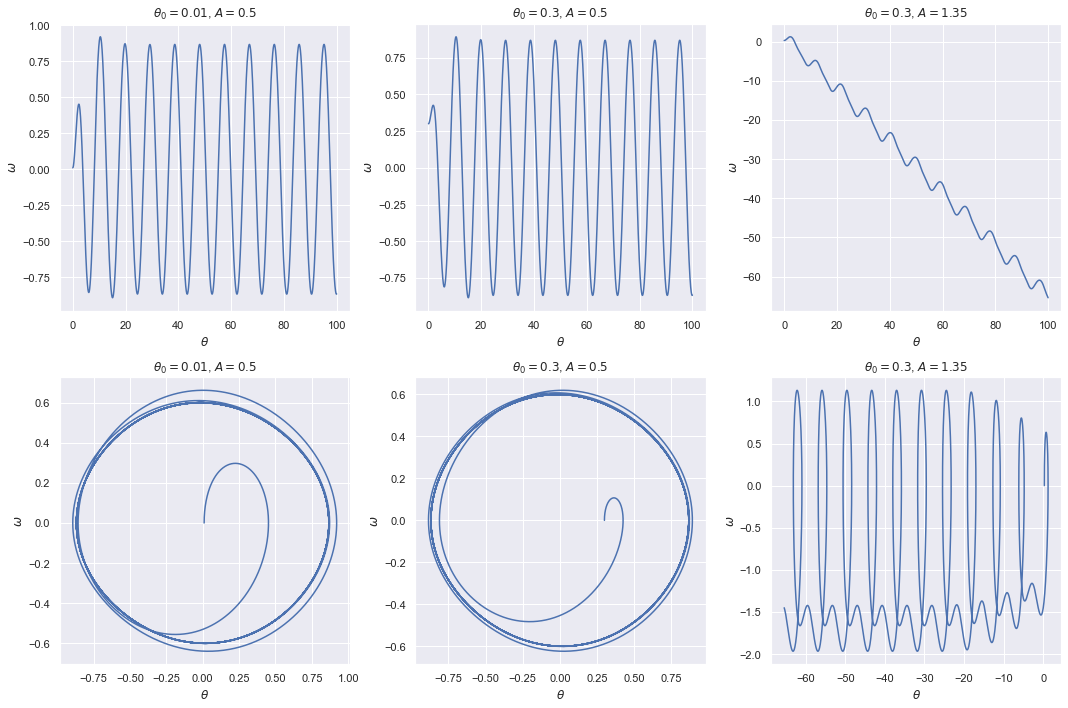

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Zależności theta(tau)
axs[0, 0].plot(tau, theta1)
axs[0, 0].set_title(r'$\theta_0 = 0.01$, $A = 0.5$')
axs[0, 1].plot(tau, theta2)
axs[0, 1].set_title(r'$\theta_0 = 0.3$, $A = 0.5$')
axs[0, 2].plot(tau, theta3)
axs[0, 2].set_title(r'$\theta_0 = 0.3$, $A = 1.35$')

# Przestrzenie fazowe
axs[1, 0].plot(theta1, omega1)
axs[1, 0].set_title(r'$\theta_0 = 0.01$, $A = 0.5$')
axs[1, 1].plot(theta2, omega2)
axs[1, 1].set_title(r'$\theta_0 = 0.3$, $A = 0.5$')
axs[1, 2].plot(theta3, omega3)
axs[1, 2].set_title(r'$\theta_0 = 0.3$, $A = 1.35$')

for ax in axs.flat:
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\omega$')
    ax.grid(True)

plt.tight_layout()
plt.show()



# Zadanie 4

## Symulacje

In [39]:
def simulate_trajectory(v0, angle, ball_size, cw, with_air=True):
    g = 9.81  # Przyspieszenie ziemskie (m/s^2)
    rho = 1.2  # Gęstość powietrza (kg/m^3)
    
    # Obliczenie pola przekroju poprzecznego piłki (A) w zależności od jej rozmiaru (promienia)
    A = np.pi * (ball_size / 2)**2  # Pole przekroju poprzecznego (m^2)
    
    # Początkowe warunki
    x0 = 0  # Początkowa pozycja pozioma (m)
    y0 = 0  # Początkowa pozycja pionowa (m)

    # Konwersja kąta na radiany
    angle_rad = np.radians(angle)
    
    # Składowe początkowej prędkości
    v0x = v0 * np.cos(angle_rad)
    v0y = v0 * np.sin(angle_rad)

    # Obliczanie czasu lotu
    t_flight = (2 * v0y) / g

    # Czas trwania symulacji
    t_max = t_flight * 2  # Podwójny czas lotu
    dt = 0.01  # Krok czasowy (s)

    # Symulacja
    t = np.arange(0, t_max, dt)
    x = [x0]
    y = [y0]
    vx = v0x
    vy = v0y

    for i in range(1, len(t)):
        if with_air:
            # Obliczanie siły oporu powietrza
            v = np.sqrt(vx**2 + vy**2)
            Foporu_x = -(1/2) * cw * rho * A * v * vx
            Foporu_y = -(1/2) * cw * rho * A * v * vy

            # Równania ruchu z uwzględnieniem oporu powietrza
            ax = Foporu_x
            ay = Foporu_y - g
        else:
            ax = 0
            ay = -g  # Bez oporu powietrza

        vx = vx + ax * dt
        vy = vy + ay * dt
        x.append(x[-1] + vx * dt)
        y.append(y[-1] + vy * dt)
        
        if y[-1] < 0:
            break
    
    return x, y

## Parametry

In [40]:
v0_values = [20, 30, 60]  # Prędkości początkowe (m/s)
angle_values = [30, 45, 60]  # Kąty rzutu (stopnie)
ball_sizes = [0.05, 0.1, 0.5]  # Rozmiary piłki (promienie w metrach)
cw = 0.35  # Współczynnik oporu powietrza

x_with_air,y_with_air=simulate_trajectory(v0_values[0],angle_values[0],ball_sizes[0],cw, with_air=True)
x_with_air2,y_with_air2=simulate_trajectory(v0_values[1],angle_values[1],ball_sizes[1],cw, with_air=True)
x_with_air3,y_with_air3=simulate_trajectory(v0_values[2],angle_values[2],ball_sizes[2],cw, with_air=True)

x_with_no_air,y_with_no_air=simulate_trajectory(v0_values[0],angle_values[0],ball_sizes[0],cw, with_air=False)
x_with_no_air2,y_with_no_air2=simulate_trajectory(v0_values[1],angle_values[1],ball_sizes[1],cw, with_air=False)
x_with_no_air3,y_with_no_air3=simulate_trajectory(v0_values[2],angle_values[2],ball_sizes[2],cw, with_air=False)

## Wykresy

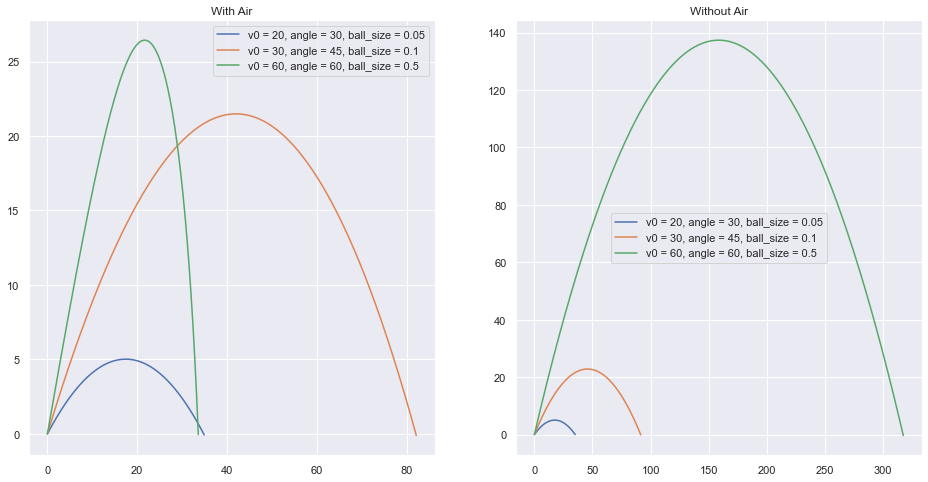

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Jeden rząd, dwie kolumny
axs[0].plot(x_with_air, y_with_air, label='v0 = 20, angle = 30, ball_size = 0.05')
axs[0].plot(x_with_air2, y_with_air2, label='v0 = 30, angle = 45, ball_size = 0.1')
axs[0].plot(x_with_air3, y_with_air3, label='v0 = 60, angle = 60, ball_size = 0.5')
axs[0].set_title('With Air')

# Wykres po prawej (with_no_air)
axs[1].plot(x_with_no_air, y_with_no_air, label='v0 = 20, angle = 30, ball_size = 0.05')
axs[1].plot(x_with_no_air2, y_with_no_air2, label='v0 = 30, angle = 45, ball_size = 0.1')
axs[1].plot(x_with_no_air3, y_with_no_air3, label='v0 = 60, angle = 60, ball_size = 0.5')
axs[1].set_title('Without Air')

# Dodanie legendy na obu wykresach
axs[0].legend()
axs[1].legend()

# Wyświetlenie wykresu
plt.show()

# Zadanie 5

In [42]:
def ef(y,x):
    return [y[1],x**2-4*y[0]]

In [43]:
def find_value(initial_dt):
    initial_con=[1,initial_dt]
    new_sol=odeint(ef,initial_con,xes)
    return new_sol[-1,0]

Text(0.5, 1.0, 'Metoda strzału')

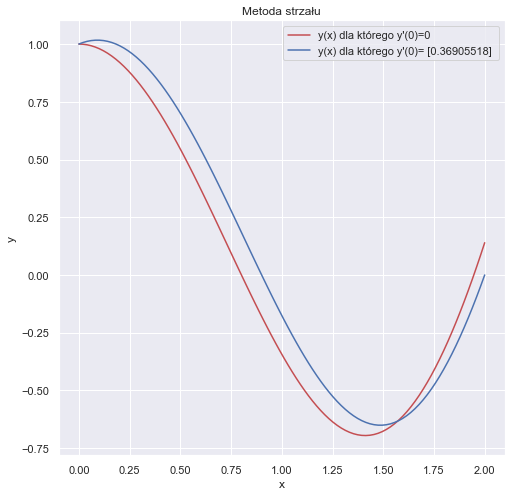

In [44]:
init=[1,0]
xes=np.linspace(0,2,100)
target=1.65364

new_target=fsolve(find_value,target)
new_init=[1,new_target]

sol=odeint(ef,init,xes)
new_sol=odeint(ef,new_init,xes)

plt.figure(figsize=(8,8))
plt.plot(xes,sol[:,0],'r',label=f"y(x) dla którego y'(0)=0")
plt.plot(xes,new_sol[:,0],'b',label=f"y(x) dla którego y'(0)= {new_target} ")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Metoda strzału')

# Zadanie 6

## Definiujemy równanie różniczkowe, [y', y'']

In [45]:
def equation(x, y):
    return [y[1], -(1 - 0.2 * x) * y[0] ** 2]

## Warunki brzegowe

In [46]:
y0 = 0
y_target = 1
x_span = [0, np.pi/2]

## Funkcja strzału

In [47]:
def shooting(dy0):
    sol = solve_ivp(equation, x_span, [y0, dy0], t_eval=[np.pi/2])
    return sol.y[0][0] - y_target

## Rozwiązanie

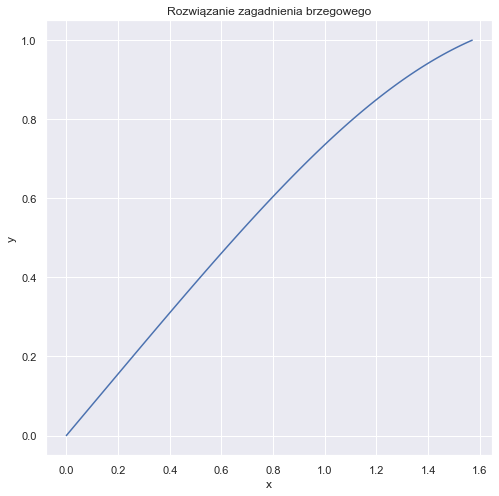

In [48]:
# szukamy y'(0)
sol = root_scalar(shooting, bracket=[-2, 2])
dy0 = sol.root

# rozwiazanie dla znalezionego y'(0)
solution = solve_ivp(equation, x_span, [y0, dy0], t_eval=np.linspace(0, np.pi/2, 100))

plt.figure(figsize=(8, 8))
plt.plot(solution.t, solution.y[0])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rozwiązanie zagadnienia brzegowego")
plt.show()
